In [16]:
import seaborn as sns
import pandas as pd 
import datetime as datetime
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import numpy as np
# Read data from file 'filename.csv' |
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
pd.options.display.float_format = '{:,.2f}'.format
data = pd.read_csv("/home/anconam/projects/Shapley_Pruning/experiments/results/log.csv.cifar10") 
data['timestamp'].apply(lambda row: str(row))
data.head()

,timestamp,epoch,train_acc,test_acc,train_loss,test_loss,n_params,n_params_full,activations,train_time,prune_time,experiment
0,20200117T121501,1,0.12,0.19,2.28,2.23,26913825,28144010,4003-4003-501-501-501-501-251-251-126-63,68.74,87.16,cifar10_sv-abs-smallest_0.5_30steps_1start_1int
1,20200117T121501,2,0.24,0.31,2.05,1.84,25727822,28144010,3912-3912-490-490-490-490-246-246-124-62,51.18,91.36,cifar10_sv-abs-smallest_0.5_30steps_1start_1int
2,20200117T121501,3,0.33,0.39,1.77,1.60,24584843,28144010,3823-3823-479-479-479-479-241-241-122-61,50.07,93.88,cifar10_sv-abs-smallest_0.5_30steps_1start_1int
3,20200117T121501,4,0.41,0.46,1.58,1.48,23514917,28144010,3736-3736-469-469-469-469-236-236-120-60,48.96,90.08,cifar10_sv-abs-smallest_0.5_30steps_1start_1int
4,20200117T121501,5,0.47,0.51,1.44,1.33,22484377,28144010,3651-3651-459-459-459-459-231-231-118-59,49.43,78.61,cifar10_sv-abs-smallest_0.5_30steps_1start_1int


### FMNIST CNN 1.8M parameters

In [17]:
dataset = "cifar10"

plot_df = data[data["experiment"].str.startswith(dataset)]
# plot_df = plot_df[plot_df["timestamp"] >= "20200116T164457"]
# plot_df = plot_df[~plot_df["experiment"].str.contains("prunedyn_sv")]
# plot_df = plot_df[~plot_df["experiment"].str.contains("in1ep")]
# plot_df = plot_df[~plot_df["experiment"].str.contains("random")]
# plot_df = plot_df[~plot_df["experiment"].str.contains("30steps")]

# Some processing
plot_df['test_acc'] *= 100
plot_df['train_acc'] *= 100
plot_df["sparsity"] = plot_df["n_params"] / plot_df["n_params_full"] * 100
plot_df["test_acc_gap"] = (plot_df["test_acc"] - plot_df["test_acc"].max()) / plot_df["test_acc"].max() * 100


In [18]:
# Rank pruning methods by Test Accuracy at the epoch of Minimum Test Loss
df_join = plot_df.join(plot_df.groupby(["timestamp"])["test_loss"].min(), on="timestamp", rsuffix="_min")
df_join = df_join[df_join["test_loss"] == df_join["test_loss_min"]]
df_join = df_join.groupby(["experiment"]).mean().sort_values(by=["test_acc"], ascending=False)
df_join.filter(["experiment", "test_acc", "test_acc_gap", "sparsity", "epoch", "test_loss"])

,test_acc,test_acc_gap,sparsity,epoch,test_loss
experiment,,,,,
cifar10_sv-abs-smallest_0.5_30steps_1start_1int,79.60,-3.10,26.19,37,0.64
cifar10_random_0.5_30steps_1start_1int,79.42,-3.32,26.19,42,0.65
cifar10_grad-abs-smallest_0.5_30steps_1start_1int,79.27,-3.51,26.19,35,0.63
cifar10_count-smallest_0.5_30steps_1start_1int,79.10,-3.71,26.19,38,0.66
cifar10_random_1.0_0steps_0start_1int,76.80,-6.51,100.00,23,0.68


In [19]:
# Rank pruning methods by best test accuracy during training and sparsity at that stage
df_join = plot_df.join(plot_df.groupby(["timestamp"])["test_acc"].max(), on="timestamp", rsuffix="_max")
df_join = df_join[df_join["test_acc"] == df_join["test_acc_max"]]
df_join = df_join.groupby(["experiment"]).mean().sort_values(by=["test_acc"], ascending=False)
df_join.filter(["experiment", "test_acc", "test_acc_gap", "sparsity", "epoch", "test_loss"])

,test_acc,test_acc_gap,sparsity,epoch,test_loss
experiment,,,,,
cifar10_grad-abs-smallest_0.5_30steps_1start_1int,82.15,0.00,26.19,112,1.10
cifar10_random_1.0_0steps_0start_1int,81.45,-0.85,100.00,71,1.21
cifar10_random_0.5_30steps_1start_1int,81.41,-0.90,26.19,122,1.10
cifar10_sv-abs-smallest_0.5_30steps_1start_1int,81.22,-1.13,26.19,115,1.14
cifar10_count-smallest_0.5_30steps_1start_1int,81.14,-1.23,26.19,144,1.04


Accuracy
                                                   test_acc
experiment                                                 
cifar10_count-smallest_0.5_30steps_1start_1int        81.14
cifar10_grad-abs-smallest_0.5_30steps_1start_1int     82.15
cifar10_random_0.5_30steps_1start_1int                81.41
cifar10_random_1.0_0steps_0start_1int                 81.45
cifar10_sv-abs-smallest_0.5_30steps_1start_1int       81.22
Training time
                                                   train_time  prune_time
experiment                                                               
cifar10_count-smallest_0.5_30steps_1start_1int       7,838.87       13.63
cifar10_grad-abs-smallest_0.5_30steps_1start_1int    6,713.68        8.42
cifar10_random_0.5_30steps_1start_1int               7,851.65        8.24
cifar10_random_1.0_0steps_0start_1int               14,267.85        0.00
cifar10_sv-abs-smallest_0.5_30steps_1start_1int      9,964.98    1,760.17
Sparsity
                              

ValueError: Could not interpret input 'experiment'

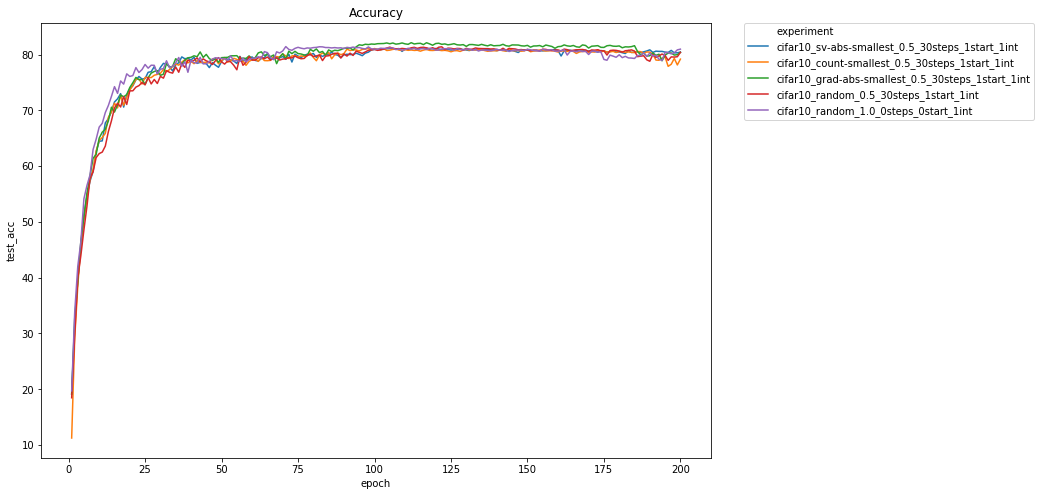

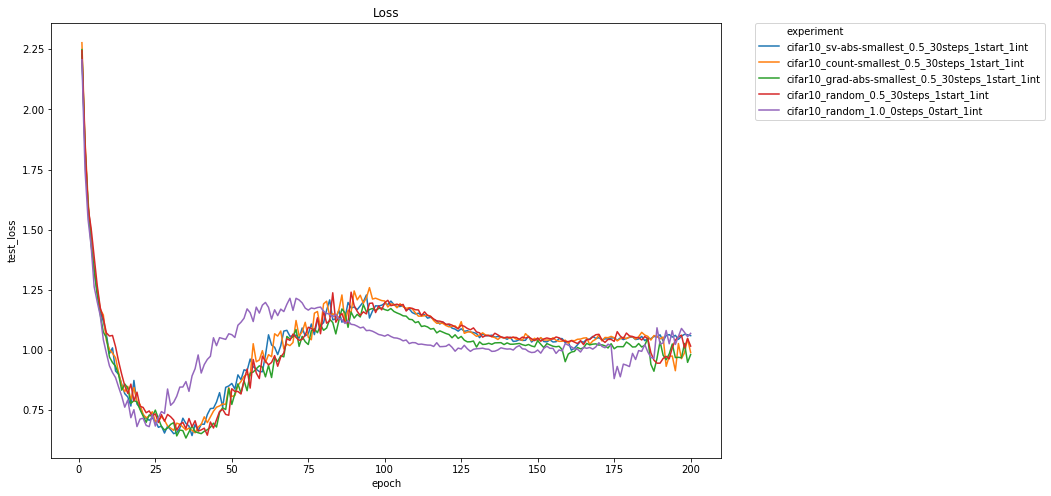

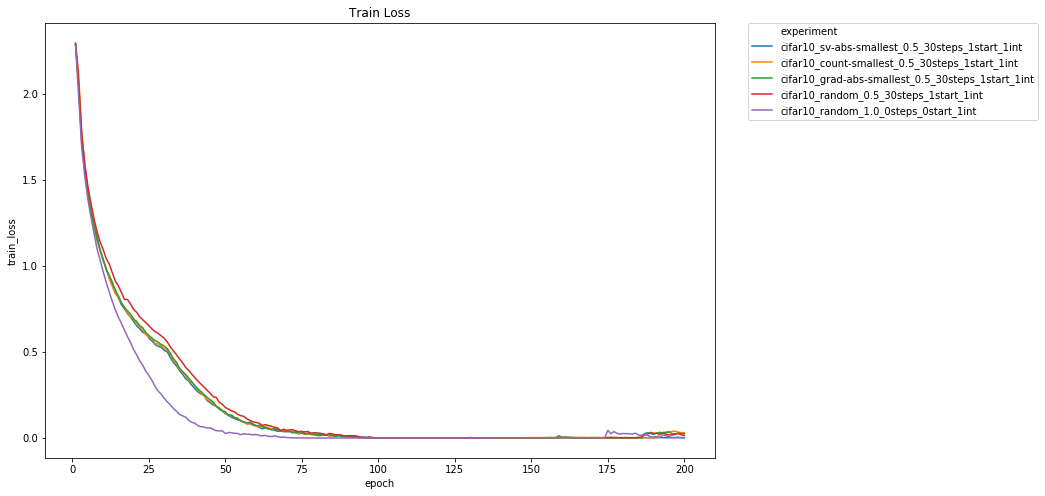

<Figure size 864x576 with 0 Axes>

In [20]:


# Print train time
print ("Accuracy")
performance_df = plot_df.groupby(['experiment', 'timestamp']).max()
performance_df = performance_df.groupby(['experiment']).mean()
print (performance_df.filter(items=["experiment", "test_acc"]))

# Print train time
print ("Training time")
time_df = plot_df.groupby(['experiment', 'timestamp']).sum()
time_df = time_df.groupby(['experiment']).mean()
print (time_df.filter(items=["experiment", "train_time", "prune_time"]))

# Weight sparsity
print ("Sparsity")
initial_params = np.max(list(plot_df.groupby(['experiment'])["n_params"].max()))
# print (initial_params)
sparsity_df = plot_df.groupby(['experiment', 'timestamp']).min()
sparsity_df = sparsity_df.groupby(['experiment']).min()
print (sparsity_df.filter(items=["experiment", "n_params"]) / initial_params * 100)


# for label in plotting_data:
plt.figure(figsize=(12,8))
sns.lineplot(x="epoch", y="test_acc", hue="experiment", data = plot_df)
plt.title("Accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# plt.figure(figsize=(12,8))
# new_plot = plot_df
# new_plot["train_time_cum"] = new_plot.groupby(['experiment', 'timestamp'])['train_time'].apply(lambda x: x.cumsum())
# sns.lineplot(x="train_time_cum", y="test_acc", hue="experiment", data = new_plot)
# plt.title("Accuracy / Wall-clock Time")
# plt.ylim([0.8, 0.98])
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="test_loss", hue="experiment", data = plot_df)
plt.title("Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="train_loss", hue="experiment", data = plot_df)
plt.title("Train Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="train_time", hue="experiment", data = cum_time_df)
plt.title("Train Time / Epoch")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="n_params", hue="experiment", data = plot_df)
plt.title("# Parameters")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
